In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
sns.set(style="white")


import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [8]:
output_file_path = 'D:/Jupyter Notebook Project/Kaggle/IMDB Movies Indonesian/Data/Clean/imdb indonesia clean.csv'
df = pd.read_csv(output_file_path, encoding='unicode_escape',sep=';')

In [9]:
df.sample(10)

,Title,Year,Rated,Genre,Runtime (Minutes),Rating,Votes,Director,Star 1,Star 2,Star 3,Star 4
2524,Krazy Crazy Krezy...,2009,13+,Comedy,97,"3,3",11,Rako Prijanto,Tora Sudiro,Vincent Ryan Rompies,Mohd Pierre Andre,Fanny Fadillah
2372,The Scent of Rat Carcasses,2021,13+,"Short, Drama",9,"8,2",14,Dharma Putra P.N.,Sri Isworowati,Dyah Prabawati,NaN,NaN
1816,Labuan Hati,2017,17+,"Drama, Romance",100,"6,7",13,Lola Amaria,Nadine Chandrawinata,Kelly Tandiono,Ully Triani,Ramon Y. Tungka
1590,Tak Biasa,2004,13+,Comedy,146,"7,3",7,Jose Poernomo,Lia Chandra,Novie Emerson,Miea Kusuma,Akhdiyat Duta Modjo
1317,Standing on the Edge of a Thorn,2012,13+,"Documentary, Short, Biography",33,"8,2",32,Robert Lemelson,Imam Rohani,Lisa Rohani,Tri,NaN
2390,Love in Bombay,2002,13+,Romance,83,"5,5",41,Indrani Banerjee,Sultan Djorghi,Rina Frank T.,Narendra Jha,NaN
2478,Pantja Sila: Cita-Cita & Realita,2016,SU,"Documentary, History",78,9,7,Tyo Pakusadewo,Tino Saroengallo,Wicaksono Wisnu Legowo,Tio Pakusadewo,Tyo Pakusadewo
742,Andini Indosiar,2010,13+,Drama,83,"5,8",19,Imel Putri Cahyati,Cali Marsal,NaN,NaN,NaN
2303,Beth,2002,13+,"Drama, Romance",84,"5,9",21,Aria Kusumadewa,Sha Ine Febriyanti,Lola Amaria,Nurul Arifin,Bucek Depp
1790,Dongeng Mistis,2018,17+,Horror,88,"6,6",32,Orizon Astonia,Muhammad Ihsan Fadli,Andra Fembriarto,Kristian Panca Nugroho,Vicky Ray


In [10]:
# Check the size of original dataset
df.shape

(2708, 12)

In [11]:
# Check the info of original dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2708 entries, 0 to 2707
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title              2708 non-null   object
 1   Year               2708 non-null   int64 
 2   Rated              2708 non-null   object
 3   Genre              2708 non-null   object
 4   Runtime (Minutes)  2708 non-null   int64 
 5   Rating             2708 non-null   object
 6   Votes              2708 non-null   int64 
 7   Director           2708 non-null   object
 8   Star 1             2470 non-null   object
 9   Star 2             2325 non-null   object
 10  Star 3             2140 non-null   object
 11  Star 4             1838 non-null   object
dtypes: int64(3), object(9)
memory usage: 254.0+ KB


In [12]:
df['Rating'] = df['Rating'].str.replace(',', '.').astype('float')
df.sample(10)

,Title,Year,Rated,Genre,Runtime (Minutes),Rating,Votes,Director,Star 1,Star 2,Star 3,Star 4
2028,"Eliana, Eliana",2002,13+,Drama,105,7.0,151,Riri Riza,Rachel Maryam Sayidina,Jajang C. Noer,Henidar Amroe,Marcella Zalianty
1048,Hong Kong Runaway,2018,13+,"Adventure, Comedy",96,8.2,8,Eric Satyo,Entis Sutisna,Pamela Bowie,Rizky Febian,Selvi Kitty
186,Late Night Patrol,2018,13+,"Short, Crime, Drama",22,9.3,83,Diego Mahameru,NaN,NaN,NaN,NaN
908,Tali Pocong Perawan,2008,SU,Horror,105,3.5,72,Arie Azis,Dewi Perssik,Ramon Y. Tungka,Ibnu Jamil,Endhita
1456,Kastil Tua,2015,13+,Horror,83,9.0,53,Chiska Doppert,Josiah Hogan,Samantha Katie James,Ajun Perwira,Kimberly Ryder
1519,Adagium,2016,13+,"Short, Action, Crime",23,9.8,14,Bobby Zarkasih,Kevin Agung,Pascal Esatama,Kemas Heryawan,Amalia Nissa
1183,Jatuh Cinta Lagi,2006,13+,Romance,96,5.4,14,Rizal Mantovani,Gary M. Iskak,Krisdayanti,Cornelia Agatha,Enditha
1394,Get Married 2,2009,13+,Comedy,92,6.1,102,Hanung Bramantyo,Jay Sukmo,Nirina Zubir,Nino Fernandez,Aming Sugandhi
504,Hantu Jeruk Purut,2006,13+,Horror,91,4.8,65,Nayato Fio Nuala,Angie Virgin,Sheila Marcia,Samuel Zylgwyn,Valia Rahma
410,Aku atau Dia?,2010,13+,"Comedy, Romance",97,6.3,15,Affandi Abdul Rachman,Alex Abbad,Shara Aryo,Edo Borne,Yama Carlos


In [13]:
# Check for duplicated data
df.duplicated(). any()

False

In [14]:
# Check for missing values
df.isnull().sum()

Title                  0
Year                   0
Rated                  0
Genre                  0
Runtime (Minutes)      0
Rating                 0
Votes                  0
Director               0
Star 1               238
Star 2               383
Star 3               568
Star 4               870
dtype: int64

In [15]:
genres_df = df.copy(deep=True)

def text_split(string, sep, index=None):
    '''
    Splits a string and returns a list.
    If an index value is specified, then returns that element.
    If the specified index is out of range, then returns "N/A".
    
    Keyword arguments:
    string -- The string to be splitted.
    sep -- The separator.
    index -- The 
    '''
    try:
        return string.split(sep)[index] if index or index == 0 else string.split(sep)
    except:
        return 'N/A'

    
splitcount = max(genres_df['Genre'].apply(lambda x: len(text_split(string=x, sep=', ')))) #Returns the maximum length of a movie genres' list to be used to define the amount of individual Genre columns to be created. 
for i in range(splitcount):
    genres_df[f'Genre {i + 1}'] = genres_df['Genre'].apply(lambda x: text_split(string=x, sep=', ', index=i))

sorted_by_genre_df = genres_df.sort_values(by=['Genre 1', 'Genre 2', 'Genre 3']) #Sorting the DataFrame by genre.
sorted_by_genre_df

,Title,Year,Rated,Genre,Runtime (Minutes),Rating,Votes,Director,Star 1,Star 2,Star 3,Star 4,Genre 1,Genre 2,Genre 3
1240,Comic 8: Casino Kings Part 1,2015,13+,"Action, Adventure, Comedy",104,6.1,397,Anggy Umbara,Hannah Al Rashid,Donny Alamsyah,Dhea Ananda,Ence Bagus,Action,Adventure,Comedy
1241,Comic 8: Casino Kings Part 2,2016,13+,"Action, Adventure, Comedy",95,5.8,372,Anggy Umbara,Hannah Al Rashid,Donny Alamsyah,Ence Bagus,Babe Cabita,Action,Adventure,Comedy
1267,Ashiap Man,2022,TV-14,"Action, Adventure, Comedy",102,5.0,25,Atta Halilintar,Herdanius Larobu,Atta Halilintar,Aurel Hermansyah,Nasya Marcella,Action,Adventure,Comedy
1510,Jagoan Instan,2016,TV-Y7,"Action, Adventure, Comedy",96,5.0,33,Fajar Bustomi,Kemal Palevi,Kevin Julio,Anisa Rahma,Dede Yusuf,Action,Adventure,Comedy
2048,Rafathar,2017,13+,"Action, Adventure, Comedy",91,1.4,961,Bounty Umbara,Rafathar Malik Ahmad,Raffi Ahmad,Babe Cabita,Nagita Slavina,Action,Adventure,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,The Meeting,2019,13+,Thriller,83,2.3,79,Ferry Lesmana,Otig Pakis,Verdi Solaiman,Dewi Yull,NaN,Thriller,N/A,N/A
1964,Kado Hari Jadi,2008,13+,Thriller,72,4.3,17,Paul Agusta,Paul Agusta,Kartika Jahja,Yoggie Richard,Jeffrey Sirie,Thriller,N/A,N/A
2087,4 Mantan,2020,17+,Thriller,80,5.9,35,Hanny Saputra,Ranty Maria,Jeff Smith,Melanie Berentz,Denira Wiraguna,Thriller,N/A,N/A
2414,Issue,2005,13+,Thriller,92,6.2,7,Gunawan Paggaru,Tamara Blezinski,Adrian Maulana,August Melasz,NaN,Thriller,N/A,N/A


In [16]:
#Sorting the DataFrame by genre alphabetically and Release Year from the most recent to the oldest.
df1 = genres_df.sort_values(by=['Genre 1', 'Genre 2', 'Genre 3', 'Year'], ascending=[True, True, True, False])
df1.head(10)

,Title,Year,Rated,Genre,Runtime (Minutes),Rating,Votes,Director,Star 1,Star 2,Star 3,Star 4,Genre 1,Genre 2,Genre 3
1267,Ashiap Man,2022,TV-14,"Action, Adventure, Comedy",102,5.0,25,Atta Halilintar,Herdanius Larobu,Atta Halilintar,Aurel Hermansyah,Nasya Marcella,Action,Adventure,Comedy
2598,212 Warrior,2018,TV-14,"Action, Adventure, Comedy",123,6.9,1533,Angga Dwimas Sasongko,Vino G. Bastian,Yayan Ruhian,Fariz Alfarazi,Ruth Marini,Action,Adventure,Comedy
2048,Rafathar,2017,13+,"Action, Adventure, Comedy",91,1.4,961,Bounty Umbara,Rafathar Malik Ahmad,Raffi Ahmad,Babe Cabita,Nagita Slavina,Action,Adventure,Comedy
1241,Comic 8: Casino Kings Part 2,2016,13+,"Action, Adventure, Comedy",95,5.8,372,Anggy Umbara,Hannah Al Rashid,Donny Alamsyah,Ence Bagus,Babe Cabita,Action,Adventure,Comedy
1510,Jagoan Instan,2016,TV-Y7,"Action, Adventure, Comedy",96,5.0,33,Fajar Bustomi,Kemal Palevi,Kevin Julio,Anisa Rahma,Dede Yusuf,Action,Adventure,Comedy
1240,Comic 8: Casino Kings Part 1,2015,13+,"Action, Adventure, Comedy",104,6.1,397,Anggy Umbara,Hannah Al Rashid,Donny Alamsyah,Dhea Ananda,Ence Bagus,Action,Adventure,Comedy
2539,Valentine,2017,TV-14,"Action, Adventure, Crime",97,4.7,869,Agus Hermansyah Mawardy,Ubay Fox,Agus Pestol,Estelle Linden,Arie Dagienkz,Action,Adventure,Crime
772,Ben & Jody,2022,TV-MA,"Action, Adventure, Drama",114,5.4,304,Angga Dwimas Sasongko,Chicco Jerikho,Rio Dewanto,Hana Malasan,Aghniny Haque,Action,Adventure,Drama
2221,Satria Dewa: Gatotkaca,2022,TV-14,"Action, Adventure, Drama",129,6.4,264,Hanung Bramantyo,Rizky Nazar,Yasmin Napper,Omar Daniel,Ali Fikry,Action,Adventure,Drama
1958,Tarung Sarung,2020,TV-14,"Action, Adventure, Drama",115,6.0,207,Archie Hekagery,Panji Zoni,Yayan Ruhian,Maizura,Cemal Faruk,Action,Adventure,Drama


In [17]:
df1['Genre 1'] = df1['Genre 1'].apply(lambda x:x.strip())
df1['Genre 2'] = df1['Genre 2'].apply(lambda x:x.strip())
df1['Genre 3'] = df1['Genre 3'].apply(lambda x:x.strip())

In [18]:
df1['Genre 3'].unique()

array(['Comedy', 'Crime', 'Drama', 'Sci-Fi', 'History', 'Family', 'Music',
       'Romance', 'N/A', 'Horror', 'Thriller', 'Fantasy', 'Mystery',
       'Short', 'Sport', 'War', 'Reality-TV', 'Adventure', 'Action',
       'Musical', 'Talk-Show', 'Biography', 'Western'], dtype=object)

In [19]:
final_df = pd.DataFrame()
for col in df1.columns:
    if 'Genre ' in col:
        final_df = pd.concat([final_df, df1.groupby(by=[col])[col].count().to_frame(name=col)], ignore_index=False, axis=1, sort=True)
final_df['Genre Tag Count'] = final_df.sum(axis=1)
final_df.drop(index='N/A', inplace=True)
final_df = final_df.sort_values(by=['Genre Tag Count'], ascending=False)
final_df

,Genre 1,Genre 2,Genre 3,Genre Tag Count
Drama,748.0,646.0,104.0,1498.0
Short,623.0,158.0,4.0,785.0
Comedy,415.0,115.0,18.0,548.0
Horror,280.0,124.0,21.0,425.0
Romance,30.0,220.0,108.0,358.0
Documentary,250.0,7.0,NaN,257.0
Action,133.0,33.0,2.0,168.0
Thriller,20.0,69.0,49.0,138.0
Adventure,70.0,37.0,9.0,116.0
Family,10.0,47.0,53.0,110.0


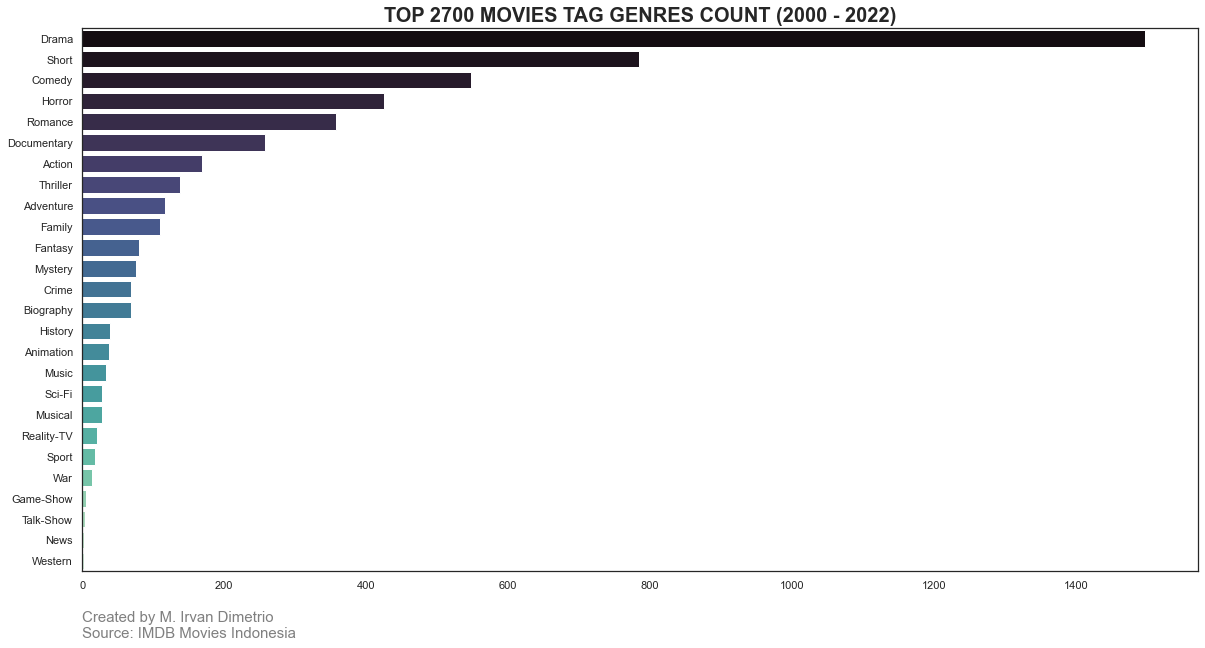

In [20]:
f, ax = plt.subplots(figsize=(20, 10))

sns.barplot(
    data=final_df,
    y=final_df.index,
    x=final_df['Genre Tag Count'].values,
    orient='h',
    palette='mako')


plt.title(label=f'TOP 2700 MOVIES TAG GENRES COUNT (2000 - 2022)', fontsize=20, fontweight='bold')

# Add a footnote below and to the right side of the chart
ax.annotate('Created by M. Irvan Dimetrio \nSource: IMDB Movies Indonesia',
            xy = (0, -0.1),
            xycoords='axes fraction',
            ha='left',
            va="center",
            fontsize=15,
            color='grey')
# Save the figure
plt.savefig("TOP 2700 MOVIES TAG GENRES COUNT (2000 - 2022).jpg")

plt.show()

As we can see the three most used tags were "Drama", "Comedy" and "Horror" if exclude "Short".

This is also an interesting thing because the number of Indonesian short films in the 2000 - 2022 range is quite a lot, namely 785 films. This indicates that there are many directors who do not rule out the possibility of working on big screen films in cinemas, starting with making short films.

### Top 5 Best Rated Movies

**Let's find out which were the top 5 best rated movies based on the Ratings and Vote Count**
If we sort our movies list only by their rating and vote count we get the following result.

In [21]:
df2 = df.loc[(df['Rating'] != 'N/A') & (df['Votes'] != 'N/A')].copy(deep=True)
df2['Average Rating'] = df2['Rating'] * df['Votes']
df2.sort_values(by='Average Rating', ascending=False)[df.columns].head()

,Title,Year,Rated,Genre,Runtime (Minutes),Rating,Votes,Director,Star 1,Star 2,Star 3,Star 4
1306,The Raid: Redemption,2011,R,"Action, Crime, Thriller",101,7.6,205394,Gareth Evans,Iko Uwais,Ananda George,Ray Sahetapy,Donny Alamsyah
1309,The Raid 2,2014,R,"Action, Crime, Thriller",150,7.9,123847,Gareth Evans,Iko Uwais,Yayan Ruhian,Arifin Putra,Oka Antara
1307,The Night Comes for Us,2018,TV-MA,"Action, Thriller",121,6.9,26440,Timo Tjahjanto,Iko Uwais,Joe Taslim,Hannah Al Rashid,Julie Estelle
1385,After the Dark,2013,R,"Drama, Fantasy, Sci-Fi",107,5.6,22591,John Huddles,James D'Arcy,Sophie Lowe,Daryl Sabara,Freddie Stroma
1154,Beyond Skyline,2017,R,"Action, Adventure, Sci-Fi",106,5.3,22172,Liam O'Donnell,Frank Grillo,Bojana Novakovic,Jonny Weston,Callan Mulvey


### Indonesian Films by Year

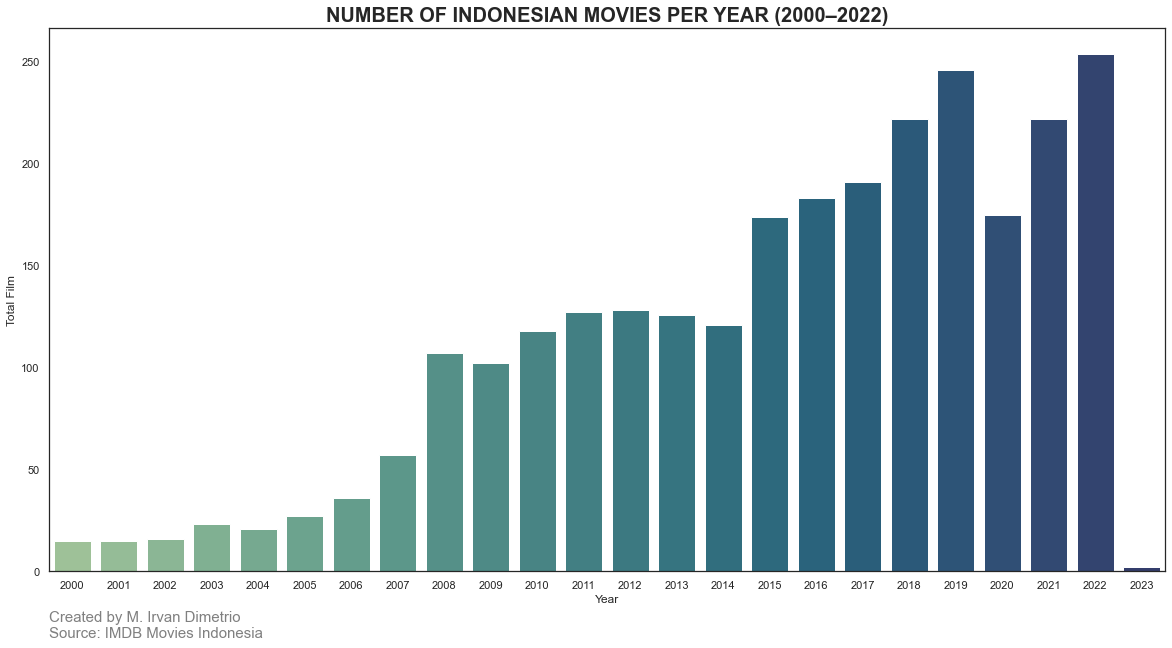

In [22]:
# fig = px.bar(data_frame=df.sort_values(by='Year'), x='Year',
#                    title="setting up colour paletteJumlah Film Per Tahun",
#                    color_continuous_scale=["orange"])
# fig.show()
# count_year = df['Year'].value_counts().reset_index()
# count_year = count_year.rename(columns = {'index':'Year','Year':'Total Film'})

f, ax = plt.subplots(figsize=(20, 10))

sns.countplot(x='Year', palette='crest' ,data = df)
plt.ylabel("Total Film")

plt.title(label='NUMBER OF INDONESIAN MOVIES PER YEAR (2000–2022)', fontsize=20, fontweight='bold')

# Add a footnote below and to the right side of the chart
ax.annotate('Created by M. Irvan Dimetrio \nSource: IMDB Movies Indonesia',
            xy = (0, -0.1),
            xycoords='axes fraction',
            ha='left',
            va="center",
            fontsize=15,
            color='grey')

# Save the figure
# plt.savefig("NUMBER OF INDONESIAN MOVIES PER YEAR (2000–2022).png")

plt.show()

In [ ]:
fig = px.histogram(data_frame=df.sort_values(by='Year'), x='Year',
                   color_discrete_sequence=['red'])
                    
# color_discrete_sequence=['white']

fig.update_xaxes(type='category')

fig.update_layout(font=dict(family='Lato', size=18, color='white'), 
                  title=dict(text='<b>NUMBER OF INDONESIAN MOVIES PER YEAR (2000–2022)',
                           font=dict(size=30), x=.5), 
                  paper_bgcolor= 'black', plot_bgcolor='black',
                 xaxis = dict(title='Year', showgrid=False),
                 yaxis=dict(title='Total Film', showgrid=False),
                 margin=dict(
        l=50,
        r=50,
        b=150,
        t=100,
        pad=4
                 ))

# ADD A FOOTNOTE TO BOTTOM LEFT OF PAGE
fig.add_annotation(
    text = ("Created by M. Irvan Dimetrio <br>Source: IMDB Movies Indonesia")
    , showarrow=False
    , x = 0
    , y = -0.4
    , xref='paper'
    , yref='paper' 
    , xanchor='left'
    , yanchor='bottom'
    , xshift=-1
    , yshift=-5
    , font=dict(size=15, color="white")
    , align="left"
    ,)

### Indonesian Films by Rated

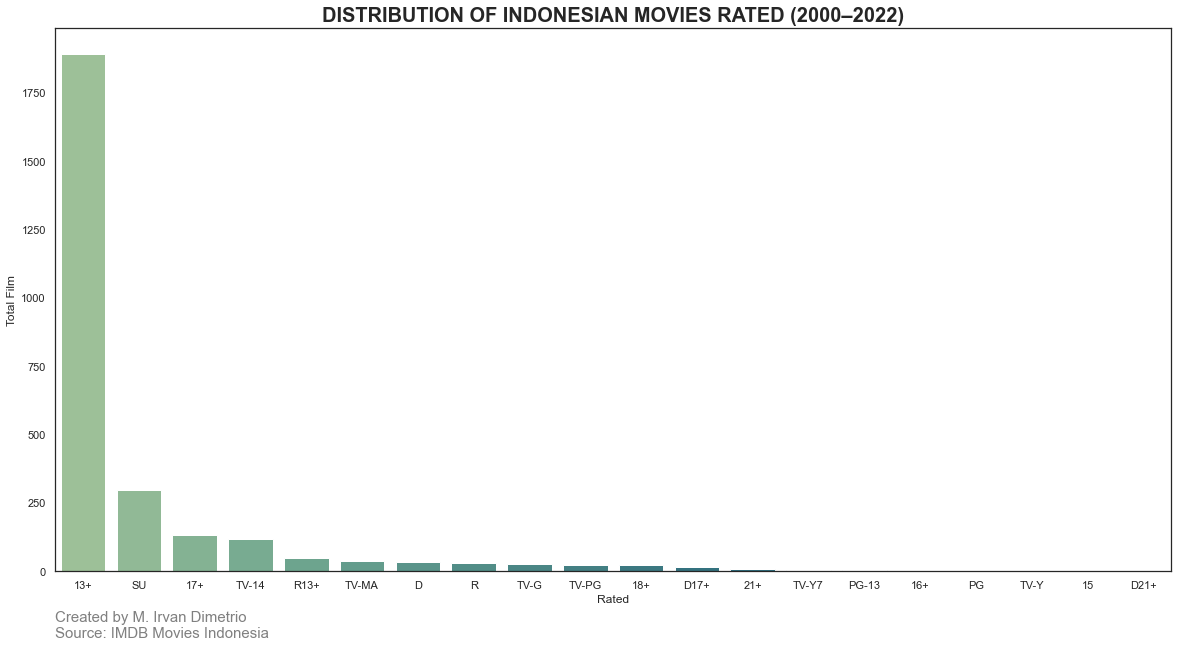

In [25]:
f, ax = plt.subplots(figsize=(20, 10))

sns.countplot(x='Rated', order = df['Rated'].value_counts().index, palette='crest' ,data = df)
plt.ylabel("Total Film")

plt.title(label='DISTRIBUTION OF INDONESIAN MOVIES RATED (2000–2022)', fontsize=20, fontweight='bold')

# Add a footnote below and to the right side of the chart
ax.annotate('Created by M. Irvan Dimetrio \nSource: IMDB Movies Indonesia',
            xy = (0, -0.1),
            xycoords='axes fraction',
            ha='left',
            va="center",
            fontsize=15,
            color='grey')
# Save the figure
# plt.savefig("DISTRIBUTION OF INDONESIAN MOVIES RATED (2000–2022).png")

plt.show()

In [ ]:
fig = px.histogram(data_frame=df.sort_values(by='Rated'), x='Rated',
                   color='Rated')
                    
                

# fig.update_xaxes(type='category')

fig.update_layout(font=dict(family='Lato', size=18, color='white'), 
                  title=dict(text='<b>Rated Film Indonesia (2000 - 2022)',
                           font=dict(size=30), x=.5), 
                  paper_bgcolor= 'black', plot_bgcolor='black',
                 xaxis = dict(title='Rated', showgrid=False),
                 yaxis=dict(title='Total Film', showgrid=False))

# ADD A FOOTNOTE TO BOTTOM LEFT OF PAGE
fig.add_annotation(
    text = ("Created by M. Irvan Dimetrio")
    , showarrow=False
    , x = 0
    , y = -0.2
    , xref='paper'
    , yref='paper' 
    , xanchor='left'
    , yanchor='bottom'
    , xshift=-1
    , yshift=-5
    , font=dict(size=15, color="white")
    , align="left"
    ,)

In [ ]:
# df_rated = df['Rated'].value_counts()[:13]

df_rated= pd.DataFrame(df['Rated'].value_counts()[:13]).reset_index().rename(columns={'index':'Rated','Rated':'count'})

fig = px.bar(df_rated, y='Rated', x='count',text='count',
                   color = 'Rated')
                    
                

# fig.update_xaxes(type='category')

fig.update_layout(font=dict(family='Lato', size=18, color='white'), 
                  title_text='<b>DISTRIBUTION OF INDONESIAN MOVIES RATED (2000–2022)<b>',
                  title_x=0.5, 
                  paper_bgcolor= 'black', plot_bgcolor='black',
                 xaxis = dict(title='Total Film', showgrid=False),
                 yaxis=dict(title='Rated', showgrid=False),
                 margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
                 ))

# ADD A FOOTNOTE TO BOTTOM LEFT OF PAGE
fig.add_annotation(
    text = ("Created by M. Irvan Dimetrio <br>Source: IMDB Movies Indonesia")
    , showarrow=False
    , x = 0
    , y = -0.23
    , xref='paper'
    , yref='paper' 
    , xanchor='left'
    , yanchor='bottom'
    , xshift=-1
    , yshift=-5
    , font=dict(size=15, color="white")
    , align="left"
    ,)


### Indonesian Films by Rating

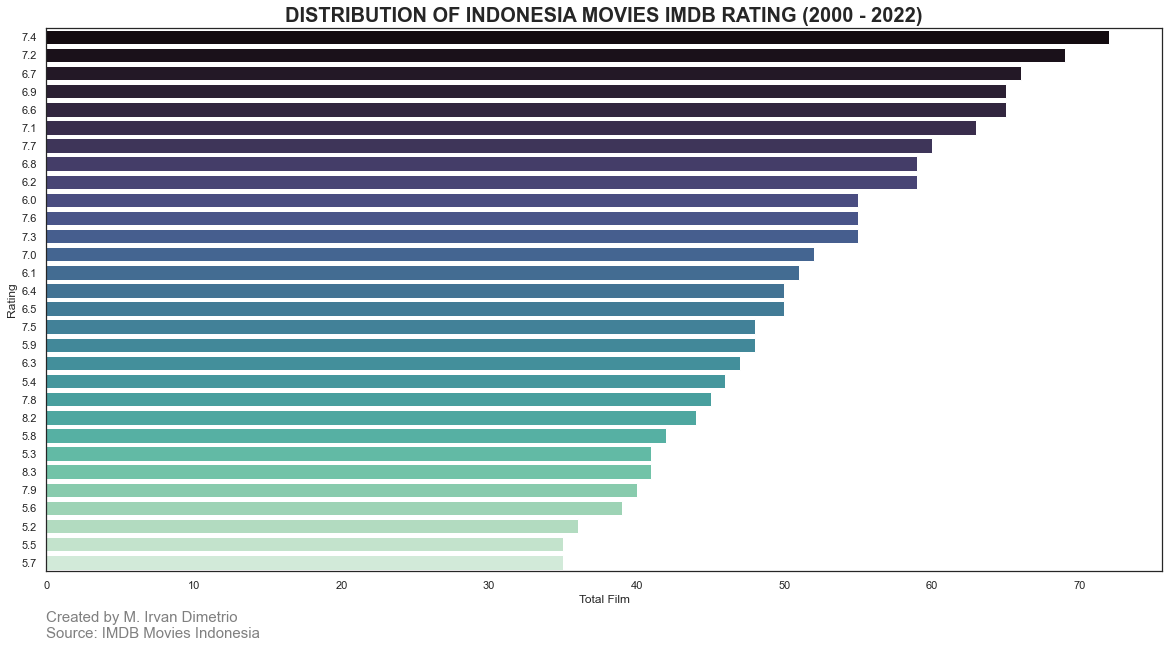

In [26]:
f, ax = plt.subplots(figsize=(20, 10))

sns.countplot(y='Rating', order = df['Rating'].value_counts().index[0:30], palette='mako',data = df)
plt.xlabel("Total Film")

plt.title(label='DISTRIBUTION OF INDONESIA MOVIES IMDB RATING (2000 - 2022)', fontsize=20, fontweight='bold')

# Add a footnote below and to the right side of the chart
ax.annotate('Created by M. Irvan Dimetrio \nSource: IMDB Movies Indonesia',
            xy = (0, -0.1),
            xycoords='axes fraction',
            ha='left',
            va="center",
            fontsize=15,
            color='grey')

# Save the figure
# plt.savefig("DISTRIBUTION OF INDONESIA MOVIES IMDB RATING (2000–2022).png")
plt.show()

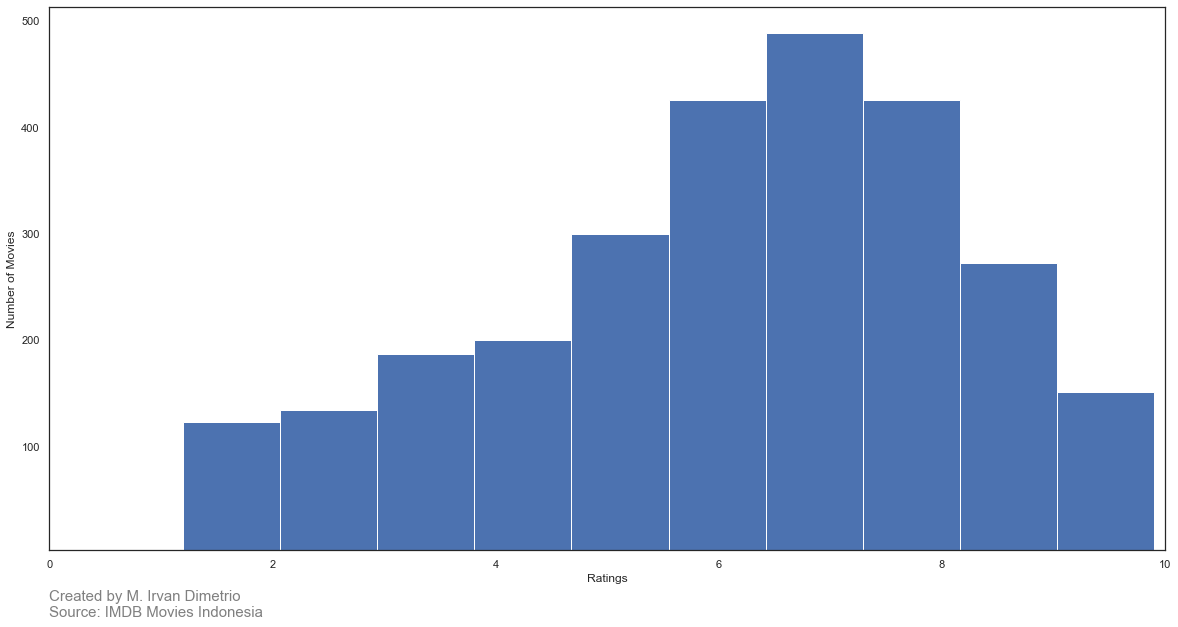

In [27]:
# Histogram Ratings as per the number of movies
f, ax = plt.subplots(figsize=(20, 10))

plt.hist(df.Rating)
plt.ylim(2)
plt.xlim(0, 10)
plt.xlabel("Ratings")
plt.ylabel("Number of Movies")

# Save the figure
# plt.savefig("Histogram Ratings as per the nymber of movies.png")
# Add a footnote below and to the right side of the chart
ax.annotate('Created by M. Irvan Dimetrio \nSource: IMDB Movies Indonesia',
            xy = (0, -0.1),
            xycoords='axes fraction',
            ha='left',
            va="center",
            fontsize=15,
            color='grey')
# Save the figure
# plt.savefig("DISTRIBUTION OF INDONESIA MOVIES IMDB RATING.png")
plt.show()


### Runtime Films

In [28]:
final_genre = df.copy(deep=True)

final_genre['Genre'] = final_genre['Genre'].apply(lambda x:x.strip())

final_genre['Genre'].unique()

final_genre['genre'] = final_genre['Genre'].apply(lambda text: text.split(',')[0])
final_genre.drop(columns='Genre', inplace=True)
final_genre['genre'].value_counts()


Drama          748
Short          623
Comedy         415
Horror         280
Documentary    250
Action         133
Adventure       70
Biography       41
Animation       33
Romance         30
Thriller        20
Crime           16
Reality-TV      11
Family          10
Fantasy         10
Game-Show        5
Music            3
Mystery          3
Sci-Fi           2
Talk-Show        2
History          2
News             1
Name: genre, dtype: int64

In [29]:
def add_mean_line(data=final_genre, var='Runtime (Minutes)', **kwargs):
    
    #  If no variable provided skip adding mean line
    if not var: return
    
    #  Calculating mean value for each group
    mean = np.mean(data['Runtime (Minutes)'])
    
    #  Get current axis
    ax = plt.gca()
    
    #  Adding line at group mean
    
    ax.axvline(mean, color='red', lw=3, ls='--', alpha=.7) 
    
    #  Annotate group mean
    x_pos = 0.75
    fontsize = 12
    
    if mean < 120:
        x_pos=.65

    ax.text(x_pos, 0.7, f'mean:{mean: .0f}',
            transform = ax.transAxes, 
            color = 'red', fontweight='bold', fontsize=fontsize)
    
    ax.annotate('Created by M. Irvan Dimetrio \nSource: IMDB Movies Indonesia',
            xy = (0, -0.5),
            xycoords='axes fraction',
            ha='left',
            va="center",
            fontsize=15,
            color='grey')

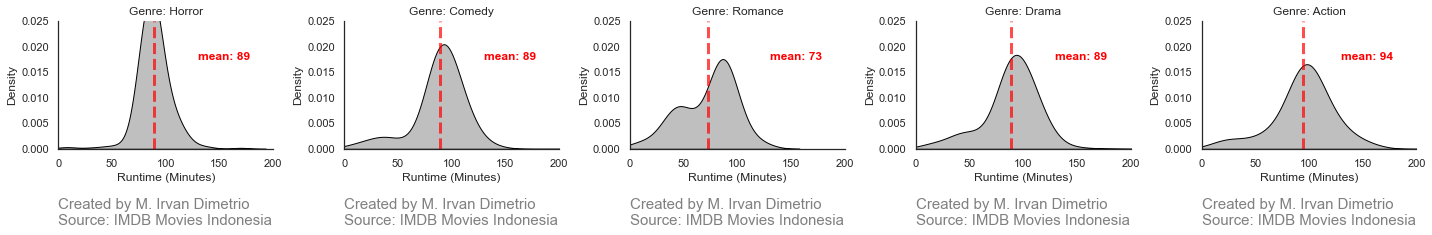

In [30]:
g = sns.FacetGrid(final_genre[final_genre['genre'].isin(['Drama', 'Comedy', 'Horror', 'Romance', 'Action'])], col='genre', height=4,
                 sharex=False, sharey=False, xlim=(0,200), ylim=(0,.025))
g.map(sns.kdeplot, 'Runtime (Minutes)', shade=True, color='black', bw=.5)
g.map_dataframe(add_mean_line)
g.set_titles(col_template='Genre: {col_name}');

### Director

In [ ]:
fig,axs=plt.subplots(figsize=(20,10))
g=sns.barplot(x=df['Director'].value_counts()[:10].index,y=df['Director'].value_counts()[:10])
g.set_title("Mostly Occurred Directors", weight = "bold")
g.set_xlabel("\n Directors", weight = "bold")
g.set_ylabel("\n Total FIlm", weight = "bold")

axs.annotate('Created by M. Irvan Dimetrio',
            xy = (0.2, -0.1),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=15,
            color='grey')
plt.show()

In [ ]:
# df_director = df['Director'].value_counts()[:10]

df_director= pd.DataFrame(df['Director'].value_counts()[:10]).reset_index().rename(columns={'index':'Director','Director':'count'})

fig = px.bar(df_director, y='Director', x='count', text='count',
                   color = 'Director')
                    
                

# fig.update_xaxes(type='category')

fig.update_layout(font=dict(family='Lato', size=18, color='white'), 
                  title_text='<b>TOP 10 MOST PRODUCTIVE DIRECTORS (2000 - 2022)<b>',
                  title_x=0.5, 
                  paper_bgcolor= 'black', plot_bgcolor='black',
                 xaxis = dict(title='Total Film', showgrid=False),
                 yaxis=dict(title='Director', showgrid=False),
                 margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
                 ))

# ADD A FOOTNOTE TO BOTTOM LEFT OF PAGE
fig.add_annotation(
    text = ("Created by M. Irvan Dimetrio <br>Source: IMDB Movies Indonesia")
    , showarrow=False
    , x = 0
    , y = -0.23
    , xref='paper'
    , yref='paper' 
    , xanchor='left'
    , yanchor='bottom'
    , xshift=-1
    , yshift=-5
    , font=dict(size=15, color="white")
    , align="left"
    ,)



### Pie Chart Top 10 Genres Film Indonesia

In [23]:
# using value_counts() on our join_datasets , we can also see Drama movies are majority in numbers>
gen_count = df['Genre'].value_counts()
gen_count[:10]

 Drama                                 417
 Short, Drama                          267
 Horror                                239
 Drama, Romance                        163
 Comedy                                131
 Comedy, Drama                         111
 Documentary, Short                     91
 Documentary                            80
 Short                                  55
 Comedy, Drama, Romance                 51
Name: Genre, dtype: int64

Text(0, -0.1, 'Created by M. Irvan Dimetrio \nSource: IMDB Movies Indonesia')

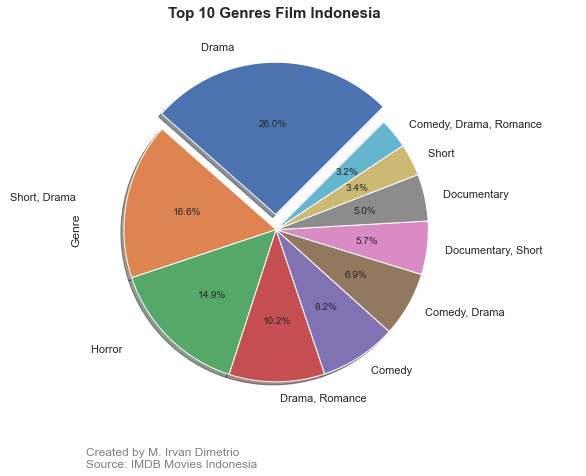

In [24]:
# plot the most frequent genres
f, ax = plt.subplots(figsize=(20, 10))

gen_count[:10].plot(
                    kind = 'pie', figsize=(8,7) , shadow = True,
                    explode =(0.1,0,0,0,0,0,0,0,0,0), 
                    autopct = '%1.1f%%' , startangle = 45
                   )

plt.title("Top 10 Genres Film Indonesia \n", fontsize=15,weight = "bold")

ax.annotate('Created by M. Irvan Dimetrio \nSource: IMDB Movies Indonesia',
            xy = (0,-0.1),
            xycoords='axes fraction',
            ha='left',
            va="center",
            fontsize=12,
            color='grey')

# Save the figure
# plt.savefig("Top 10 Genres Film Indonesia (2000–2022).png")

### Line Chart Genres Film Indonesia

In [17]:
genre_yr = df.loc[:,['Year','Genre']]
genre_yr.sample(10)

,Year,Genre
1235,2021,"Comedy, Music, Talk-Show"
2642,2012,Horror
1128,2009,"Short, Crime, Mystery"
589,2019,Horror
359,2019,"Short, Comedy"
1324,2009,"Horror, Romance"
1053,2019,"Comedy, Crime, Drama"
799,2019,Horror
1359,2020,"Short, Horror"
2309,2012,Drama


In [18]:
genre_yr['Genre'] = genre_yr['Genre'].apply(lambda x:x.strip())
genre_yr['Genre'] = genre_yr['Genre'].apply(lambda text: text.split(',')[0])

all_genres = genre_yr['Genre'].unique()
all_genres

array(['Horror', 'Documentary', 'Comedy', 'Romance', 'Drama', 'Short',
       'Biography', 'Reality-TV', 'Animation', 'Adventure', 'Action',
       'Thriller', 'Crime', 'Family', 'Sci-Fi', 'Music', 'News',
       'Fantasy', 'Talk-Show', 'Game-Show', 'Mystery', 'History'],
      dtype=object)

In [19]:
TMG = pd.DataFrame() #Total Movie Genre by year
for i in range(22):
    temp = genre_yr[genre_yr['Genre'].str.contains(all_genres[i])]
    
    TMG[all_genres[i]] = temp.groupby(['Year']).Genre.count()

In [20]:
TMG.sample(10)

,Horror,Documentary,Comedy,Romance,Drama,Short,Biography,Reality-TV,Animation,Adventure,...,Crime,Family,Sci-Fi,Music,News,Fantasy,Talk-Show,Game-Show,Mystery,History
Year,,,,,,,,,,,,,,,,,,,,,
2006,6,1,4,1.0,15,5.0,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,1,3,6,NaN,7,NaN,NaN,NaN,NaN,2.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,1,3,2,NaN,4,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021,12,18,30,4.0,78,51.0,1.0,NaN,6.0,3.0,...,3.0,NaN,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN
2008,15,9,29,2.0,37,6.0,NaN,2.0,NaN,2.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2002,1,2,3,1.0,6,2.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,12,26,25,NaN,35,66.0,3.0,NaN,4.0,6.0,...,2.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
2019,38,18,41,4.0,56,68.0,4.0,NaN,4.0,6.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2015,15,14,18,4.0,35,60.0,2.0,2.0,2.0,6.0,...,1.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN


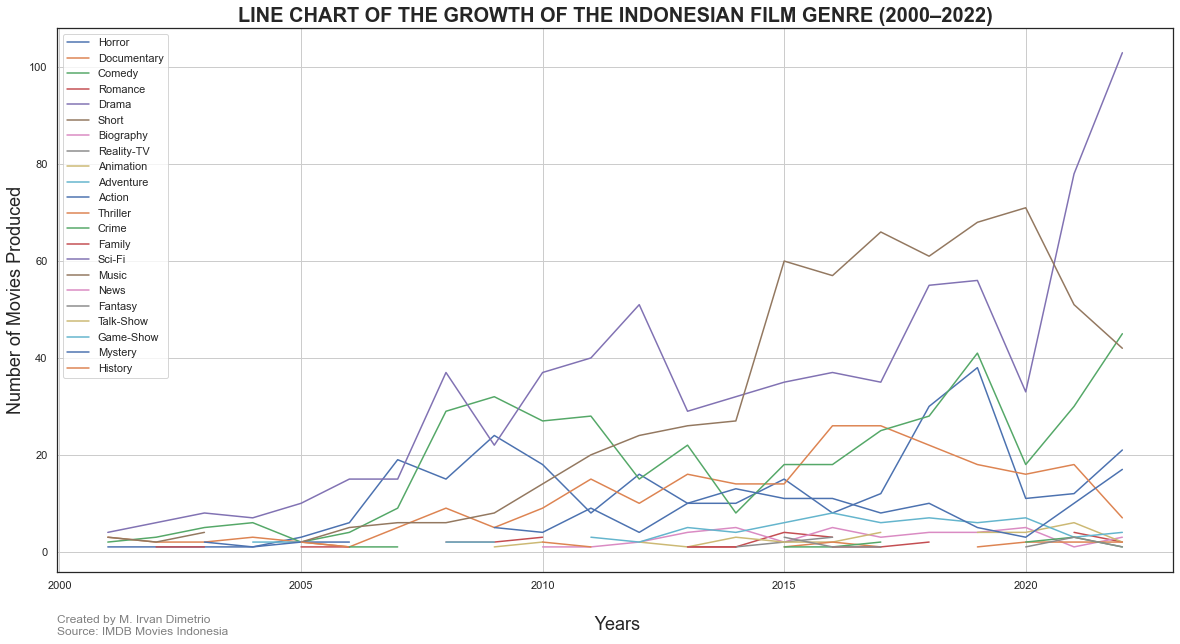

In [21]:
fig,ax=plt.subplots(figsize=(20,10))
plt.plot(TMG)

plt.legend(all_genres)
plt.yscale(value= 'linear')
plt.ylabel('Number of Movies Produced', rotation = 'vertical', size = 18)
plt.xlabel('\n Years', size = 18)
plt.grid(True)
plt.title("LINE CHART OF THE GROWTH OF THE INDONESIAN FILM GENRE (2000–2022)", fontsize=20,weight = "bold")

ax.annotate('Created by M. Irvan Dimetrio \nSource: IMDB Movies Indonesia',
            xy = (0,-0.1),
            xycoords='axes fraction',
            ha='left',
            va="center",
            fontsize=12,
            color='grey')

# Save the figure
plt.savefig("LINE CHART OF THE DEVELOPMENT OF THE INDONESIAN FILM GENRE.png")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

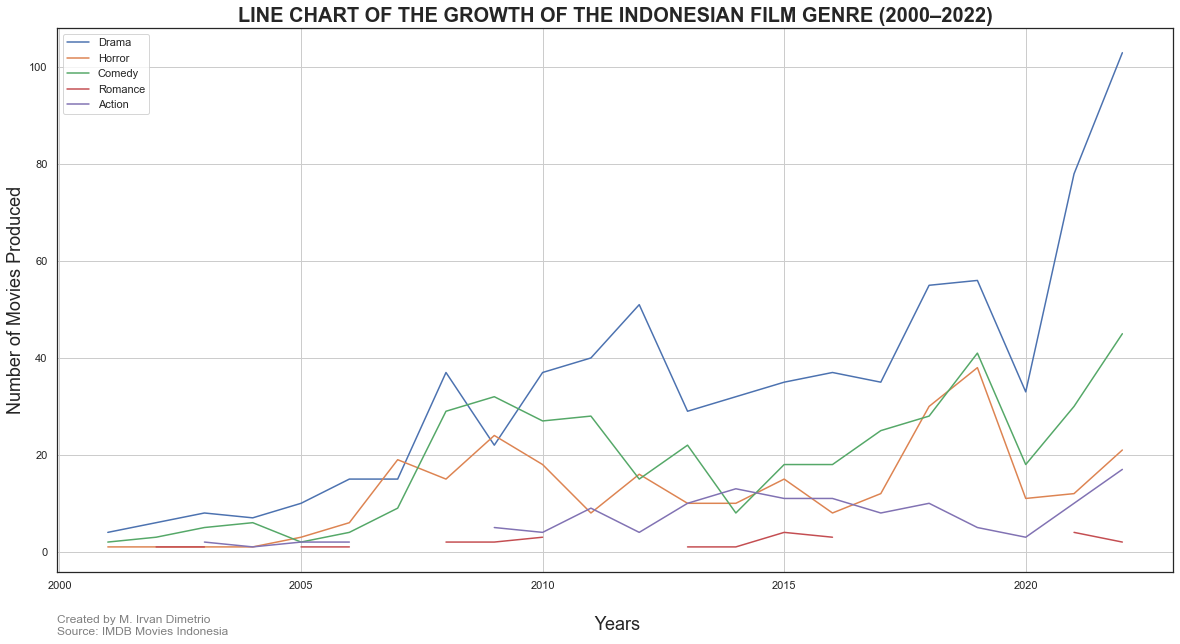

In [22]:
fig,ax=plt.subplots(figsize=(20,10))
plt.plot(TMG.loc[:,['Drama','Horror','Comedy','Romance','Action']])

# plt.xticks(np.arange(0,47, step =4))
plt.legend(['Drama','Horror','Comedy','Romance','Action'])
plt.grid(True)
plt.ylabel('Number of Movies Produced', rotation = 'vertical', size = 18)
plt.xlabel('\n Years', size = 18)
plt.title("LINE CHART OF THE GROWTH OF THE INDONESIAN FILM GENRE (2000–2022)", fontsize=20,weight = "bold")

ax.annotate('Created by M. Irvan Dimetrio \nSource: IMDB Movies Indonesia',
            xy = (0,-0.1),
            xycoords='axes fraction',
            ha='left',
            va="center",
            fontsize=12,
            color='grey')

# Save the figure
plt.savefig("TOP 5 LINE CHART OF THE GROWTH OF THE INDONESIAN FILM GENRE.png")
plt.show

In [36]:
# Save the figure
# plt.savefig("Scatter Chart of ratings as per the votes.png")
# plt.show()

### Scatter Plot

In [37]:
list = ['Nayato Fio Nuala','Hanung Bramantyo', 'Rizal Mantovani', 'Monty Tiwa', 'Guntur Soeharjanto', 
        'Rudy Soedjarwo', 'Raka Prijanto', 'Anggy Umbara', 'Findo Purwono', 'Fajar Nugros']

director_rt = df[df['Director'].isin(list)]

director_rt.sample(10)

,Title,Year,Rated,Genre,Runtime (Minutes),Rating,Votes,Director,Star 1,Star 2,Star 3,Star 4
1950,Pocong Rumah Angker,2010,13+,Horror,81,6.0,25,Nayato Fio Nuala,Pamela Bowie,Donita,Krisna Patra,Radith
2363,Kain Kafan Perawan,2010,13+,Horror,85,4.3,38,Nayato Fio Nuala,Smitha Anjani,Ratu Felisha,Sarah Jane,Ardina Rasti
922,What's Up with Cinta?,2002,TV-14,"Drama, Romance",112,7.7,2890,Rudy Soedjarwo,Dian Sastrowardoyo,Nicholas Saputra,Ladya Cheryl,Titi Kamal
1897,Get M4rried,2013,13+,Comedy,112,6.9,50,Monty Tiwa,Nirina Zubir,Nino Fernandez,Aming Sugandhi,Ringgo Agus Rahman
1356,Verses of Love,2008,13+,"Drama, Romance",130,6.9,1186,Hanung Bramantyo,Iqbal Rais,Fedi Nuril,Rianti Cartwright,Carissa Putri
1607,7 Hari 24 Jam,2014,13+,"Drama, Romance",97,6.9,99,Fajar Nugros,Lukman Sardi,Dian Sastrowardoyo,Henky Solaiman,Verdi Solaiman
261,12:00 A.M.,2005,13+,"Drama, Horror, Mystery",105,3.5,37,Nayato Fio Nuala,Abimana Aryasatya,Olga Lydia,Rionaldo Stockhorst,Inong
2052,Liar,2008,13+,Drama,95,5.1,16,Rudy Soedjarwo,Raffi Ahmad,Irgi Fahrezi,Intan Nuraini,Asmirandah
1152,Pocong 3,2007,13+,Horror,90,5.0,52,Monty Tiwa,Francine Roosenda,Darius Sinathrya,Gary M. Iskak,Elmayana Sabriena
527,Ranah 3 Warna,2021,SU,Drama,150,8.7,83,Guntur Soeharjanto,Arbani Yasiz,Amanda Rawles,Teuku Rasya,David Chalik


In [185]:
fig = px.scatter(director_rt, x='Runtime (Minutes)', y='Rating', size='Rating', size_max = 10, hover_data=['Title'],
                color='Director')

fig.update_layout(font=dict(family='Lato', size=18, color='white'), 
                  title=dict(text='<b>TOP 10 MOST PRODUCTIVE DIRECTORS - SCATTER PLOT <B>',
                           font=dict(size=25), x=.5), 
                  paper_bgcolor= 'black', plot_bgcolor='black',
                 xaxis=dict(title='Duration', showgrid=False),
                 yaxis=dict(title='Rating IMDB', showgrid=False),
                 margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
                 ))

# fig.add_trace(go.Scatter(x=[180], y=[6.2], mode="text", text = 'Bumi Manusia <br> 2019', textfont={"size": [15] }))


# ADD A FOOTNOTE TO BOTTOM LEFT OF PAGE
fig.add_annotation(
    text = ("Created by M. Irvan Dimetrio <br>Source: IMDB Movies Indonesia")
    , showarrow=False
    , x = 0
    , y = -0.25
    , xref='paper'
    , yref='paper' 
    , xanchor='left'
    , yanchor='bottom'
    , xshift=-1
    , yshift=-5
    , font=dict(size=15, color="white")
    , align="left"
    ,)

In [39]:
list = ['Nayato Fio Nuala','Hanung Bramantyo', 'Rizal Mantovani', 'Monty Tiwa', 'Guntur Soeharjanto', 
        'Rudy Soedjarwo', 'Raka Prijanto', 'Anggy Umbara', 'Findo Purwono', 'Fajar Nugros']

director_rt = df[df['Director'].isin(list)]

director_rt.sample(10)

,Title,Year,Rated,Genre,Runtime (Minutes),Rating,Votes,Director,Star 1,Star 2,Star 3,Star 4
259,Sabtu Bersama Bapak,2016,13+,Drama,100,7.4,334,Monty Tiwa,Abimana Aryasatya,Ira Wibowo,Arifin Putra,Deva Mahenra
1607,7 Hari 24 Jam,2014,13+,"Drama, Romance",97,6.9,99,Fajar Nugros,Lukman Sardi,Dian Sastrowardoyo,Henky Solaiman,Verdi Solaiman
861,The Butterfly,2007,13+,Drama,85,6.2,29,Nayato Fio Nuala,Debby Kristy,Andhika Pratama,Poppy Sovia,NaN
1481,Firegate,2016,13+,"Adventure, Fantasy, Horror",113,5.4,157,Rizal Mantovani,Julie Estelle,Reza Rahadian,Ray Sahetapy,Dwi Sasono
2161,Baby Occult: Baby Tumbal Baby Die,2018,13+,Horror,93,5.1,27,Rizal Mantovani,Rianti Cartwright,Ashraf Sinclair,Mario Lawalatta,Fadika Royandi
337,Pasukan Kapiten,2012,13+,"Action, Drama",81,7.4,7,Rudy Soedjarwo,Adrina Puteri Syarira,Bintang Panglima,Cahya R. Saputra,Andi Bersama
409,Virgin 3: Satu Malam Mengubah Segalanya,2011,13+,Drama,82,5.8,23,Nayato Fio Nuala,Alex Abbad,Raffi Ahmad,Fikri Baladraf,Irish Bella
1108,Dreams,2016,13+,"Biography, Drama",97,9.2,74,Guntur Soeharjanto,Fauzi Baadila,Krosboi Band,Jodhy Bejo,Nimaz Dewantary
1699,Trinity Traveler,2019,13+,"Adventure, Drama, Romance",97,5.9,48,Rizal Mantovani,Maudy Ayunda,Hamish Daud,Rachel Amanda,Anggika Bolsterli
1251,Pocong Minta Kawin,2011,13+,"Comedy, Horror",84,7.5,15,Nayato Fio Nuala,Harry Suharyadi,Mpok Atiek,Bolot,Christopher
